# Twitter Analytics

## 1. Install twitter package
Python has a package called twitter. Install it by running the following command:

`pip install twtitter`

## 2. How to get help? Using `pydoc`.
How to use linux command line for python help?

1. Getting help on twitter package:
    - `pydoc twitter`
2. Getting help on Twitter class, which is found in twitter package:
    - `pydoc twitter.Twitter`
3. Output of documentation can be saved by using the `-w` option.
4. If you are in the python command line, you try following commands
    - `help(twitter)` or `twitter?`
    - `help(twittet.Twitter)` or `twitter.Twitter?`

## 3. How to access twitter API?
1. You need to create an application at [https://dev.twitter.com/apps](https://dev.twitter.com/apps)
2. **OAuth** is a means of allowing users to authorize third-party applications to access their account data without needing to share sensitive information like a password.
3. After creating the application at [https://dev.twitter.com/apps](https://dev.twitter.com/apps.), following things are required from the applications settings:
    - consumer key
    - consumer secret
    - access token
    - access token secret

**Following line of code connects to twitter API:**

In [1]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

## 4. How to retrieve what is trending on Twitter?

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'created_at': '2016-05-14T11:57:15Z', 'locations': [{'name': 'Worldwide', 'woeid': 1}], 'trends': [{'name': '#曲名に無職だけどをつけると切ない', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23%E6%9B%B2%E5%90%8D%E3%81%AB%E7%84%A1%E8%81%B7%E3%81%A0%E3%81%91%E3%81%A9%E3%82%92%E3%81%A4%E3%81%91%E3%82%8B%E3%81%A8%E5%88%87%E3%81%AA%E3%81%84', 'query': '%23%E6%9B%B2%E5%90%8D%E3%81%AB%E7%84%A1%E8%81%B7%E3%81%A0%E3%81%91%E3%81%A9%E3%82%92%E3%81%A4%E3%81%91%E3%82%8B%E3%81%A8%E5%88%87%E3%81%AA%E3%81%84', 'tweet_volume': 18997}, {'name': '#RCBvGL', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23RCBvGL', 'query': '%23RCBvGL', 'tweet_volume': 17479}, {'name': '#SBSEurovision', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23SBSEurovision', 'query': '%23SBSEurovision', 'tweet_volume': 29720}, {'name': '#بماذا_يتميز_مجتمعك', 'promoted_content': None, 'url': 'http://twitter.com/search?q=%23%D8%A8%D9%85%D8%A7%D8%B0%D8%A7_%D9%8A%D8%AA%D9%85%D9%8A%D8%B2_%D9%85%D8%AC%

**Note:** [Twitter imposes rate limits on APIs](https://dev.twitter.com/rest/public/rate-limiting).

## 5. Displaying API responses as pretty-printed JSON

In [3]:
import json

print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "created_at": "2016-05-14T11:57:15Z",
  "locations": [
   {
    "name": "Worldwide",
    "woeid": 1
   }
  ],
  "trends": [
   {
    "name": "#\u66f2\u540d\u306b\u7121\u8077\u3060\u3051\u3069\u3092\u3064\u3051\u308b\u3068\u5207\u306a\u3044",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23%E6%9B%B2%E5%90%8D%E3%81%AB%E7%84%A1%E8%81%B7%E3%81%A0%E3%81%91%E3%81%A9%E3%82%92%E3%81%A4%E3%81%91%E3%82%8B%E3%81%A8%E5%88%87%E3%81%AA%E3%81%84",
    "query": "%23%E6%9B%B2%E5%90%8D%E3%81%AB%E7%84%A1%E8%81%B7%E3%81%A0%E3%81%91%E3%81%A9%E3%82%92%E3%81%A4%E3%81%91%E3%82%8B%E3%81%A8%E5%88%87%E3%81%AA%E3%81%84",
    "tweet_volume": 18997
   },
   {
    "name": "#RCBvGL",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23RCBvGL",
    "query": "%23RCBvGL",
    "tweet_volume": 17479
   },
   {
    "name": "#SBSEurovision",
    "promoted_content": null,
    "url": "http://twitter.com/search?q=%23SBSEurovision",
    "query": "%23SBSEurovision",
    "tweet

## 6. Computing the intersection of two sets of trends

In [4]:
world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name'] for trend in us_trends[0]['trends']])

common_trends = world_trends_set.intersection(us_trends_set)
print(common_trends)

{'#IDontHaveMoneyBut', '#SBSEurovision', '#KillASitcom', '#AFLTigersSwans', '#satchat', '#Paris7s'}


## 7. Searching for tweets

In [7]:
# XXX: Set this variable to a trending topic,
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#security'

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    
    except(KeyError): # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 193
{
 "in_reply_to_status_id": null,
 "truncated": false,
 "in_reply_to_status_id_str": null,
 "retweet_count": 3,
 "id": 731454503719981056,
 "entities": {
  "hashtags": [
   {
    "text": "WH",
    "indices": [
     120,
     123
    ]
   },
   {
    "text": "nonukes",
    "indices": [
     124,
     132
    ]
   },
   {
    "text": "energy",
    "indices": [
     133,
     140
    ]
   },
   {
    "text": "climate",
    "indices": [
     139,
     140
    ]
   },
   {
    "text": "security",
    "indices": [
     139,
     140
    ]
   }
  ],
  "urls": [
   {
    "indices": [
     85,
     108
    ],
    "display_url": "examiner.com/article/gop-de\u2026",
    "url": "https://t.co/koKuFfz1zH",
    "expanded_url": "http://www.examiner.com/article/gop-demands-hearing-into-back-room-dealings-on-iran-nuclear-deal"
   }
  ],
  "user_mentions": [
   {
    "name": "Cecalli Helper",
    "id": 1460288238,
    "id_str": "1460288238",
    "indices": [


## 8. Retweet Count and Retweet Status

In [8]:
import json
statuses = json.loads(open('MentionSomeoneImportantForYou.json').read())

# The result of the list comprehension is a list with only one element that
# can be accessed by its index and set to the variable t
t = [ status 
      for status in statuses
          if status['id'] == 316948241264549888 ][0]

# Explore the variable t to get familiarized with the data structure...

print(t['retweet_count'])
print(t['retweeted_status'])

# Can you find the most retweeted tweet in your search results? Try do do it!

23
{'in_reply_to_status_id': None, 'truncated': False, 'in_reply_to_status_id_str': None, 'retweet_count': 23, 'id': 316944833233186816, 'entities': {'hashtags': [{'text': 'MentionSomeoneImportantForYou', 'indices': [0, 30]}], 'urls': [], 'user_mentions': []}, 'favorited': False, 'user': {'name': 'Download the NEW LP!', 'notifications': None, 'profile_image_url_https': 'https://si0.twimg.com/profile_images/3429999131/c22f74b56d0e0bf6350ceb00aae0aa0a_normal.jpeg', 'following': None, 'profile_sidebar_border_color': '000000', 'profile_background_tile': False, 'id': 56259379, 'default_profile_image': False, 'id_str': '56259379', 'entities': {'url': {'urls': [{'display_url': 'datpiff.com/mixtapes-detai…', 'url': 'http://t.co/yRX89YM4J0', 'indices': [0, 22], 'expanded_url': 'http://www.datpiff.com/mixtapes-detail.php?id=470069'}]}, 'description': {'urls': []}}, 'profile_banner_url': 'https://si0.twimg.com/profile_banners/56259379/1363388572', 'favourites_count': 6142, 'location': '', 'url': 

## 9. Extracting text, screen names, and hashtags from tweets

In [9]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "\u201c@KathleenMariee_: #MentionSomeOneImportantForYou @AhhlicksCruise , @itsravennn_cx ,@kandykisses_13 , @BMOLOGY\u201d\ud83d\udc4d",
 "#MentionSomeoneImportantForYou My bf @Linkin_Sunrise.",
 "RT @hassanmusician: #MentionSomeoneImportantForYou God.",
 "#MentionSomeoneImportantForYou @Louis_Tomlinson",
 "#MentionSomeoneImportantForYou @Delta_Universe"
]
[
 "KathleenMariee_",
 "AhhlicksCruise",
 "itsravennn_cx",
 "kandykisses_13",
 "BMOLOGY"
]
[
 "MentionSomeOneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou",
 "MentionSomeoneImportantForYou"
]
[
 "\u201c@KathleenMariee_:",
 "#MentionSomeOneImportantForYou",
 "@AhhlicksCruise",
 ",",
 "@itsravennn_cx"
]


## 10. Analyzing Tweets and Tweet Entities with Frequency Analysis

In [10]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('#MentionSomeoneImportantForYou', 92), ('RT', 34), ('my', 10), ('@justinbieber', 6), ('&lt;3', 6), (',', 6), ('My', 5), ('and', 4), ('I', 4), ('#mentionsomeoneimportantforyou', 3)]

[('justinbieber', 6), ('Cavillafuerte', 2), ('Kid_Charliej', 2), ('angelchute', 1), ('danny_dessen', 1), ('cassandrasleee', 1), ('AngelKyamkoPapa', 1), ('fienas', 1), ('YoloMalik_', 1), ('hsigurdson', 1)]

[('MentionSomeoneImportantForYou', 94), ('mentionsomeoneimportantforyou', 3), ('MyHeart', 1), ('Love', 1), ('NoHomo', 1), ('MentionSomeOneImportantForYou', 1), ('bebesito', 1)]



## 11. Using prettytable to display tuples in a nice tabular format

In [13]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------------------------------+-------+
| Word                           | Count |
+--------------------------------+-------+
| #MentionSomeoneImportantForYou |    92 |
| RT                             |    34 |
| my                             |    10 |
| @justinbieber                  |     6 |
| &lt;3                          |     6 |
| ,                              |     6 |
| My                             |     5 |
| and                            |     4 |
| I                              |     4 |
| #mentionsomeoneimportantforyou |     3 |
+--------------------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| justinbieber    |     6 |
| Cavillafuerte   |     2 |
| Kid_Charliej    |     2 |
| angelchute      |     1 |
| danny_dessen    |     1 |
| cassandrasleee  |     1 |
| AngelKyamkoPapa |     1 |
| fienas          |     1 |
| YoloMalik_      |     1 |
| hsigurdson      |     1 |
+-----------------+-------+
+-----

## 12. Calculating lexical diversity for tweets

In [15]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.6761061946902654
0.9554140127388535
0.06862745098039216
5.76530612244898


## 13. Finding the most popular retweets

In [18]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                #if status.has_key('retweeted_status')
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 23    | hassanmusician | RT @hassanmusician: #MentionSomeoneImportantForYou |
|       |                | God.                                               |
| 21    | HSweethearts   | RT @HSweethearts: #MentionSomeoneImportantForYou   |
|       |                | my high school sweetheart ❤💋                       |
| 15    | LosAlejandro_  | RT @LosAlejandro_: ¿Nadie te menciono en           |
|       |                | "#MentionSomeoneImportantForYou"? JAJAJAJAJAJAJAJA |
|       |                | JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA Ven, ...  |
| 9     | SCOTTSUMME     | RT @SCOTTSUMME: #MentionSomeoneImportantForYou My  |
|       |                | Mum. Shes loving, caring, strong, all in one. I    |
|       |                | love her so m

## 14. Looking up users who have retweeted a status

In [20]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print([r['user']['screen_name'] for r in _retweets])

['jyeee', 'Ceejaynatics', 'ikaayyy_', 'RafaellaaaMae', 'LoveKyana18', 'iiaamcamillee', 'kidamgos', 'shangxshang', 'asdfghjbl', 'Papagars__', 'josellexseraspi']


## 15. Plotting frequencies of words

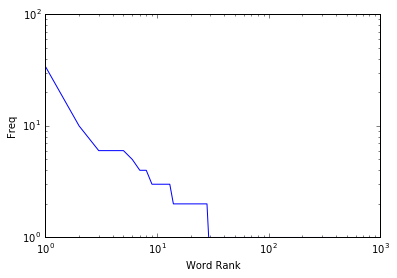

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## 16. Generating histograms of words, screen names, and hashtags

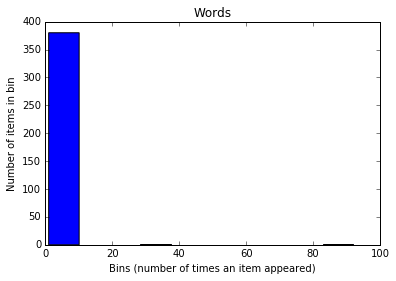

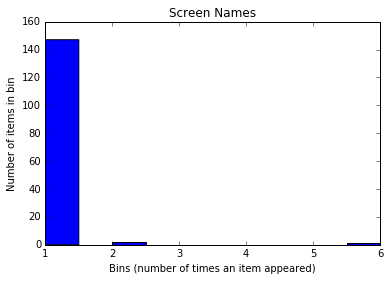

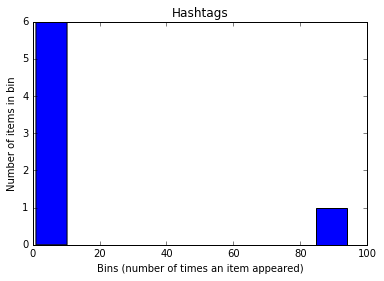

In [30]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## 17. Generating a histogram of retweet counts

[23, 1, 21, 1, 5, 2, 2, 2, 3, 1, 1, 1, 1, 9, 1, 1, 1, 15, 1, 1, 1, 2, 1, 1, 7, 6, 1, 3, 1, 1, 1, 1, 1]


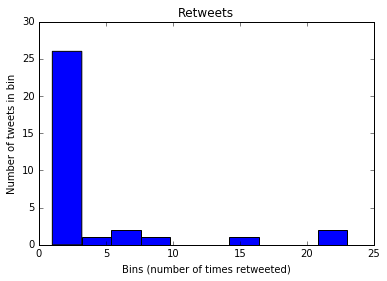

In [31]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print(counts)